In [16]:
import math

import pandas as pd
import numpy as np


detect_df = pd.read_csv('../detector_stats.csv')
print(detect_df.columns.values)
agg_detect_df = detect_df.groupby(['detector']).agg({'num_keypoints': np.mean, 
                                                     'neighb_size_mean': np.mean,
                                                    'neighb_size_var': np.mean})
print(agg_detect_df)

['detector' 'num_keypoints' 'neighb_size_mean' 'neighb_size_var'
 'image_num']
           num_keypoints  neighb_size_mean  neighb_size_var
detector                                                   
AKAZE              160.4          7.595978         12.84164
BRISK              280.4         21.586940        199.11720
FAST               411.8          7.000000          0.00000
HARRIS              53.6          4.000000          0.00000
ORB                104.4         56.536440        653.84080
SHITOMASI          121.2          4.000000          0.00000
SIFT               133.2          4.889564         33.43502


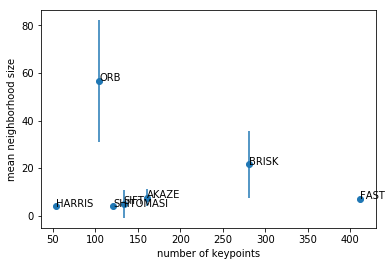

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x=agg_detect_df['num_keypoints'], y=agg_detect_df['neighb_size_mean'])
plt.xlabel('number of keypoints')
plt.ylabel('mean neighborhood size')
plt.errorbar(agg_detect_df['num_keypoints'],
             agg_detect_df['neighb_size_mean'],
             yerr=agg_detect_df['neighb_size_var'].apply(math.sqrt), linestyle="None")

for detector in agg_detect_df.index:
    plt.annotate(detector, 
                 (agg_detect_df['num_keypoints'][detector],agg_detect_df['neighb_size_mean'][detector]))

['detector' 'descriptor' 'detector_time' 'descriptor_time' 'num_matches'
 'image_num']


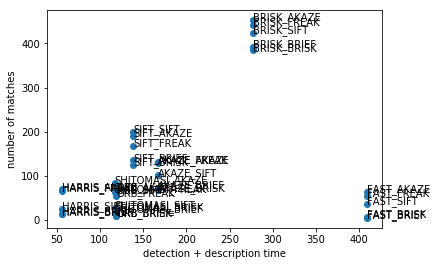

In [27]:

match_df = pd.read_csv('../matcher_stats.csv')
print(match_df.columns.values)
agg_match_df = match_df.groupby(['detector', 'descriptor'], as_index=False).agg({'num_matches': np.mean, 
                                                     'detector_time': np.mean,
                                                     'descriptor_time': np.mean})
t = agg_match_df['detector_time'] + agg_match_df['descriptor_time']
conc = agg_match_df.apply(lambda x: f"{x['detector']}_{x['descriptor']}", axis=1)

plt.scatter(agg_match_df['num_matches'], t)
plt.ylabel('number of matches')
plt.xlabel('detection + description time')
for i, (x, y) in enumerate(zip(agg_match_df['num_matches'], t)):
    plt.annotate(conc[i], (x,y))